In [169]:
import pandas as pd 
df=pd.read_csv('C:\\Users\\jessi\\Downloads\\FinalBalancedDataset.csv')

In [170]:
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [123]:
df.columns

Index(['Unnamed: 0', 'Toxicity', 'tweet'], dtype='object')

In [171]:
df=df[['tweet','Toxicity']]

In [172]:
df['cleaned_tweet'] = ''
df

,tweet,Toxicity,cleaned_tweet
0,@user when a father is dysfunctional and is s...,0,
1,@user @user thanks for #lyft credit i can't us...,0,
2,bihday your majesty,0,
3,#model i love u take with u all the time in ...,0,
4,factsguide: society now #motivation,0,
...,...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,
56741,"you've gone and broke the wrong heart baby, an...",1,
56742,young buck wanna eat!!.. dat nigguh like I ain...,1,
56743,youu got wild bitches tellin you lies,1,


In [116]:
#There 
df.isna().sum()

tweet       0
Toxicity    0
dtype: int64

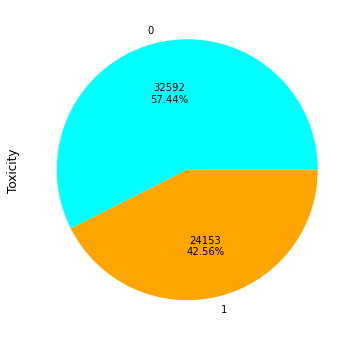

In [117]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.2f}%'

fig, (ax) = plt.subplots(figsize=(6,6))
df.groupby('Toxicity').size().plot(kind='pie', autopct=label_function,ax=ax,colors=["cyan","orange"])
ax.set_ylabel('Toxicity', size=12)
plt.show()


# Cleaning the text by removing unnecessary symbols and extra spaces 

In [173]:
import re
def cleantext(tweetText):
    tweetText = re.sub('#\S+', '', tweetText)  # remove hashtags
    tweetText = re.sub('@\S+', '  ', tweetText)  # remove @
    tweetText = re.sub('[%s]' % re.escape("""!"#$%&()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', tweetText)  # remove punctuations
    tweetText = re.sub('\s+', ' ',tweetText)  # remove extra whitespace
    tweetText = re.sub('[^A-Za-z0-9 ]+', '', tweetText) # remove characters that are not a letters or numbers
    return tweetText
    
df['cleaned_tweet'] = df.tweet.apply(lambda x: cleantext(x))

In [174]:
df

,tweet,Toxicity,cleaned_tweet
0,@user when a father is dysfunctional and is s...,0,when a father is dysfunctional and is so self...
1,@user @user thanks for #lyft credit i can't us...,0,thanks for credit i cant use cause they dont ...
2,bihday your majesty,0,bihday your majesty
3,#model i love u take with u all the time in ...,0,i love u take with u all the time in ur
4,factsguide: society now #motivation,0,factsguide society now
...,...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,yous a muthaf in lie right His TL is trash Now...
56741,"you've gone and broke the wrong heart baby, an...",1,youve gone and broke the wrong heart baby and ...
56742,young buck wanna eat!!.. dat nigguh like I ain...,1,young buck wanna eat dat nigguh like I aint fu...
56743,youu got wild bitches tellin you lies,1,youu got wild bitches tellin you lies


In [133]:
#Extracting toxic and non toxic tweets separately
toxic_df = df.loc[df['Toxicity'] == 1]
non_toxic_df = df.loc[df['Toxicity'] == 0]
print("The number of toxic and non-toxic tweets in the dataset are %f and %f respectively" %(len(toxic_df),len(non_toxic_df)))

The number of toxic and non-toxic tweets in the dataset are 24153.000000 and 32592.000000 respectively


# Generating word cloud for toxic and non-toxic tweets

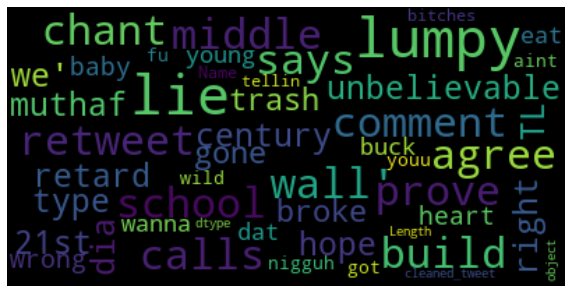

In [141]:
#TOXIC TWEETS
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud( background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(toxic_df['cleaned_tweet']))

print(wordcloud)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

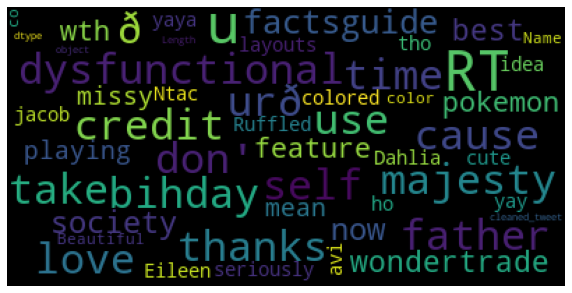

In [140]:
#Word cloud for non toxic tweets

wordcloud = WordCloud( background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(non_toxic_df['cleaned_tweet']))

print(wordcloud)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

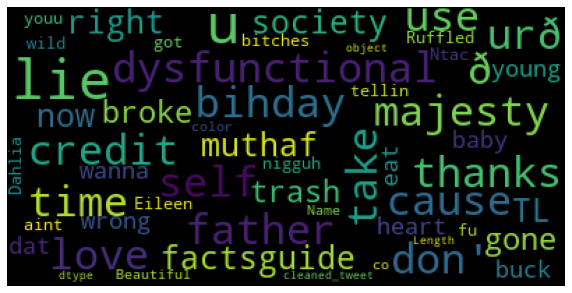

In [142]:
#Word cloud for entire tweet

wordcloud = WordCloud( background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['cleaned_tweet']))

print(wordcloud)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [205]:
df['cleaned_tweet']

0         when a father is dysfunctional and is so self...
1         thanks for credit i cant use cause they dont ...
2                                      bihday your majesty
3               i love u take with u all the time in ur   
4                                  factsguide society now 
                               ...                        
56740    yous a muthaf in lie right His TL is trash Now...
56741    youve gone and broke the wrong heart baby and ...
56742    young buck wanna eat dat nigguh like I aint fu...
56743                youu got wild bitches tellin you lies
56744     Ruffled Ntac Eileen Dahlia Beautiful color co...
Name: cleaned_tweet, Length: 56745, dtype: object

In [193]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 2000

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['cleaned_tweet'].values)
x = tokenizer.texts_to_sequences(df['cleaned_tweet'].values)

x = pad_sequences(x) #independant variable/tweets
y = df['Toxicity'].values# dependant variable/ toxicity

In [194]:
x

array([[   0,    0,    0, ...,  320,  190,   93],
       [   0,    0,    0, ...,   38, 1765,    8],
       [   0,    0,    0, ...,    0,  154,   25],
       ...,
       [   0,    0,    0, ...,  597,   37,  202],
       [   0,    0,    0, ...,   27,    5, 1501],
       [   0,    0,    0, ...,   30,   26,   28]])

# LSTM

In [195]:
#LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embed_dim = 64
lstm_out = 16

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=x.shape[1]))
model.add(LSTM(lstm_out))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 37, 64)            128000    
_________________________________________________________________
lstm (LSTM)                  (None, 16)                5184      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 133,201
Trainable params: 133,201
Non-trainable params: 0
_________________________________________________________________
None


In [196]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(39721, 37) (39721,)
(17024, 37) (17024,)


In [199]:
batch_size = 16
model.fit(x_train,
          y_train,
          epochs=6,
          batch_size=batch_size,
          validation_data=(x_test, y_test)
           )

Epoch 1/6
2483/2483 [==============================] - 35s 14ms/step - loss: 0.1134 - accuracy: 0.9548 - val_loss: 0.2223 - val_accuracy: 0.9265
Epoch 2/6
2483/2483 [==============================] - 44s 18ms/step - loss: 0.1023 - accuracy: 0.9594 - val_loss: 0.2446 - val_accuracy: 0.9245
Epoch 3/6
2483/2483 [==============================] - 39s 16ms/step - loss: 0.0912 - accuracy: 0.9645 - val_loss: 0.2588 - val_accuracy: 0.9199
Epoch 4/6
2483/2483 [==============================] - 38s 15ms/step - loss: 0.0808 - accuracy: 0.9687 - val_loss: 0.2821 - val_accuracy: 0.9230
Epoch 5/6
2483/2483 [==============================] - 40s 16ms/step - loss: 0.0706 - accuracy: 0.9730 - val_loss: 0.3020 - val_accuracy: 0.9205
Epoch 6/6
2483/2483 [==============================] - 37s 15ms/step - loss: 0.0636 - accuracy: 0.9763 - val_loss: 0.3151 - val_accuracy: 0.9169


In [210]:
#Getting the predictions
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

#Here train and test predictions are given in terms of probabilties, so we will convert it into zeros and ones 
#based on threshold value

for i in range(len(pred_train)):
    if pred_train[i][0] < 0.5:
        pred_train[i][0] = 0
    else:
        pred_train[i][0] = 1
        
for i in range(len(pred_test)):
    if pred_test[i][0] < 0.5:
        pred_test[i][0] = 0
    else:
        pred_test[i][0] = 1


In [211]:
#Dataframe to compare actual and predicted values of train data
train_data=pd.DataFrame()
train_data['Actual']=y_train
train_data['Prediction']=pred_train

#Dataframe to compare actual and predicted values of test data
test_data=pd.DataFrame()
test_data['Actual']=y_test
test_data['Prediction']=pred_test

In [212]:
train_data

,Actual,Prediction
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,1.0
...,...,...
39716,0,0.0
39717,1,1.0
39718,1,1.0
39719,0,0.0


In [213]:
test_data

,Actual,Prediction
0,1,0.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
17019,0,0.0
17020,0,0.0
17021,0,0.0
17022,0,0.0


<AxesSubplot:>

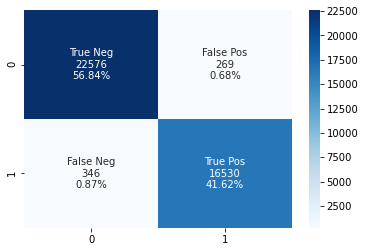

In [236]:
# Classification report and confusion matrix for training set
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np 


#Get the confusion matrix
cnf_matrix_train = confusion_matrix(train_data['Actual'], train_data['Prediction']) #confusion matrix for train data
cnf_matrix_test = confusion_matrix(test_data['Actual'], test_data['Prediction']) #confusion matrix for test data

#Heat map for train data
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_train.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_train.flatten()/np.sum(cnf_matrix_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_train, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

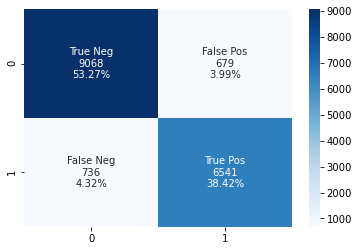

In [237]:
#Heat map for train data
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_test.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_test.flatten()/np.sum(cnf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_test, annot=labels, fmt='', cmap='Blues')

In [251]:
#Performance metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def metrics(train_prediction,test_prediction):
    
    #accuracy score for train and test
    accuracy_score_train=accuracy_score(y_train,train_prediction)
    accuracy_score_test=accuracy_score(y_test,test_prediction)
    
   #precision score for train and test
    precision_score_train=precision_score(y_train,train_prediction)
    precision_score_test=precision_score(y_test,test_prediction)
   
    #Recall score for train and test
    recall_score_train=recall_score(y_train,train_prediction)
    recall_score_test=recall_score(y_test,test_prediction)
    
    #f1 score for train and test
    f1_score_train=f1_score(y_train,train_prediction)
    f1_score_test=f1_score(y_test,test_prediction)
    
  
    eval_metrics=pd.DataFrame({'Training set':[accuracy_score_train,precision_score_train,recall_score_train,
                                               f1_score_train],
                    'Testing set':[accuracy_score_test,precision_score_test,recall_score_test,f1_score_test]},
                    index =['Accuary','Precision','Recall','F1 score'])
    
    return eval_metrics

In [252]:
metrics(train_data['Prediction'],test_data['Prediction'])

,Training set,Testing set
Accuary,0.984517,0.916882
Precision,0.983987,0.905956
Recall,0.979498,0.898859
F1 score,0.981737,0.902394


# GRU

In [256]:
# find the length of the largest sentence in training data
max_words = 10000
emb_dim = 300
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))


In [257]:
emb_dim = embedding_matrix.shape[1]
gru_model = Sequential()
gru_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation = 'sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(gru_model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
gru_13 (GRU)                 (None, 128)               165120    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 3,165,249
Trainable params: 165,249
Non-trainable params: 3,000,000
_________________________________________________________________
None


In [258]:
batch_size = 256
epochs  = 10
history = gru_model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size = batch_size, epochs = epochs)

Epoch 1/10
156/156 [==============================] - 35s 210ms/step - loss: 0.6843 - accuracy: 0.5738 - val_loss: 0.6826 - val_accuracy: 0.5725
Epoch 2/10
156/156 [==============================] - 36s 231ms/step - loss: 0.6826 - accuracy: 0.5738 - val_loss: 0.6830 - val_accuracy: 0.5725
Epoch 3/10
156/156 [==============================] - 38s 241ms/step - loss: 0.6815 - accuracy: 0.5778 - val_loss: 0.6827 - val_accuracy: 0.5725
Epoch 4/10
156/156 [==============================] - 37s 236ms/step - loss: 0.6830 - accuracy: 0.5724 - val_loss: 0.6826 - val_accuracy: 0.5725
Epoch 5/10
156/156 [==============================] - 37s 237ms/step - loss: 0.6819 - accuracy: 0.5773 - val_loss: 0.6826 - val_accuracy: 0.5725
Epoch 6/10
156/156 [==============================] - 39s 249ms/step - loss: 0.6819 - accuracy: 0.5760 - val_loss: 0.6826 - val_accuracy: 0.5725
Epoch 7/10
156/156 [==============================] - 41s 260ms/step - loss: 0.6819 - accuracy: 0.5755 - val_loss: 0.6826 - val_ac